In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [2]:
merged_df = pd.read_csv('../../data/medical/medical_data.csv')
# merged_df.head(), merged_df.shape, merged_df.columns.unique()

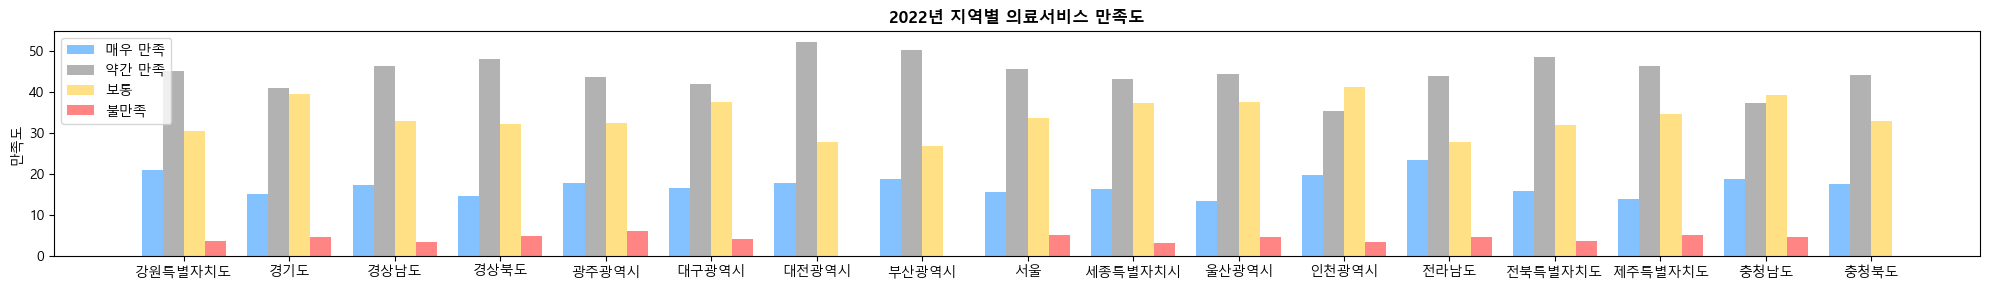

In [3]:
# 의료서비스만족도 시각화
merged_df['매우 불만족'] = pd.to_numeric(merged_df['매우 불만족'], errors='coerce')
merged_df['불만족'] = (merged_df['약간 불만족'] + merged_df['매우 불만족'])

data_2022 = merged_df[merged_df['시점'] == 2022]
labels = data_2022['지역별']
x = range(len(labels))

very_satisfied_rates = data_2022['매우 만족']
somewhat_satisfied_rates = data_2022['약간 만족']
average_rates = data_2022['보통']
dissatisfied_rates = data_2022['불만족']

bar_width = 0.2

plt.figure(figsize=(20, 3))
plt.bar(x, very_satisfied_rates, width=bar_width, label='매우 만족', color=(0.2, 0.6, 1.0, 0.6), align='center')
plt.bar([p + bar_width for p in x], somewhat_satisfied_rates, width=bar_width, label='약간 만족', color=(0.5, 0.5, 0.5, 0.6), align='center')
plt.bar([p + bar_width * 2 for p in x], average_rates, width=bar_width, label='보통', color=(1.0, 0.8, 0.2, 0.6), align='center')
plt.bar([p + bar_width * 3 for p in x], dissatisfied_rates, width=bar_width, label='불만족', color=(1.0, 0.2, 0.2, 0.6), align='center')

plt.ylabel('만족도')
plt.title('2022년 지역별 의료서비스 만족도', fontweight='bold')
plt.xticks([p + bar_width * 1.5 for p in x], labels)
plt.legend()

plt.tight_layout()
plt.show()

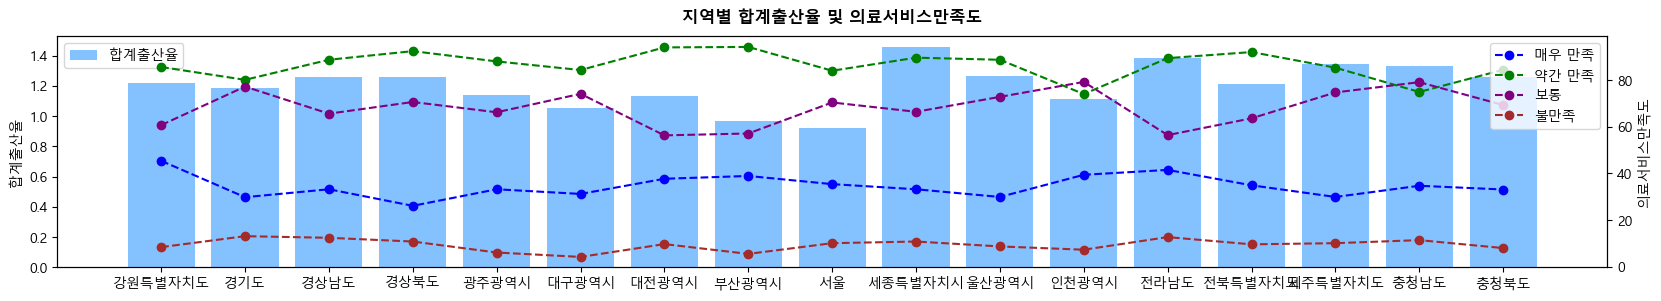

In [4]:
# 합계출산율과 의료서비스만족도 시각화
merged_df['합계출산율'] = pd.to_numeric(merged_df['합계출산율'], errors='coerce')
fertility_data = merged_df.groupby('지역별')['합계출산율'].mean().reset_index()

satisfaction_data = {
    '매우 만족': merged_df.groupby('지역별')['매우 만족'].sum(),
    '약간 만족': merged_df.groupby('지역별')['약간 만족'].sum(),
    '보통': merged_df.groupby('지역별')['보통'].sum(),
    '불만족': merged_df.groupby('지역별')['불만족'].sum()
}
satisfaction_df = pd.DataFrame(satisfaction_data).reset_index()

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(fertility_data['지역별'], fertility_data['합계출산율'], color=(0.2, 0.6, 1.0, 0.6), label='합계출산율', alpha=0.6)
ax1.set_title('지역별 합계출산율 및 의료서비스만족도', pad=10, fontweight='bold')
ax1.set_ylabel('합계출산율', fontsize=10)
ax1.set_xticks(range(len(fertility_data['지역별'])))
ax1.set_xticklabels(fertility_data['지역별'])

ax2 = ax1.twinx()
colors = ['blue', 'green', 'purple', 'brown']
for idx, category in enumerate(satisfaction_df.columns[1:]):
    ax2.plot(satisfaction_df['지역별'], satisfaction_df[category], 
             marker='o', label=category, color=colors[idx], linestyle='--')

ax2.set_ylabel('의료서비스만족도', fontsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')